In [1]:
print("Hello World!")

Hello World!


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Or
# mnist = tensorflow.keras.datasets.mnist
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.15.0


In [3]:
# Load the data
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [4]:
# Preprocess the data
x_train, x_test = x_train/255.0 , x_test/255.0 # Normalize pixel values to range [0, 1]

In [5]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28)), # Input layer: Flatten 2D input to 1D
    tf.keras.layers.Dense(128,activation="relu"), #  Hidden layer with 128 neurons, ReLU activation = rectified linear unit; each neuron in this layer is connected to every neuron in the previous layer
    tf.keras.layers.Dropout(0.2), # Prevents overfitting;  20% of input units set to zero at each update during training
    tf.keras.layers.Dense(10) # Output layer with 10 neurons for classification; output raw logics as it has no activation function; during classification softmax can be used
    ])

In [6]:
# Make predictions
predictions = model(x_train[:1]).numpy() # Assuming x_train contains the input data
predictions

array([[ 0.13142382, -0.19357894, -0.6300816 , -0.39883822, -0.03943047,
        -0.33126062, -0.29511458, -0.12940013, -0.24511485,  0.09480263]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.13653871, 0.09865268, 0.06375851, 0.08034632, 0.11509454,
        0.08596358, 0.08912766, 0.10519169, 0.09369731, 0.13162895]],
      dtype=float32)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) # Sparse categorical crossentropy loss for integer labels
loss_fn(y_train[:1], predictions).numpy()

2.4538314

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2) # Assuming x_train and y_train are the training data
# x_train = independent variables holding all the data
# y_train = target variable (dependent) to be predicted or classified

Epoch 1/5
1500/1500 [==============================] - 15s 9ms/step - loss: 0.3189 - accuracy: 0.9075 - val_loss: 0.1535 - val_accuracy: 0.9563
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1553 - accuracy: 0.9545 - val_loss: 0.1105 - val_accuracy: 0.9677
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1165 - accuracy: 0.9656 - val_loss: 0.0973 - val_accuracy: 0.9713
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0930 - accuracy: 0.9718 - val_loss: 0.0923 - val_accuracy: 0.9731
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0779 - accuracy: 0.9765 - val_loss: 0.0874 - val_accuracy: 0.9738


In [10]:
# Evaluate the model
test_loss, test_acc = history.model.evaluate(x_test, y_test, verbose = 2)
print("Test accuracy: ", test_acc)
print("Test loss: ", test_loss)

313/313 - 1s - loss: 0.0788 - accuracy: 0.9748 - 874ms/epoch - 3ms/step
Test accuracy:  0.9747999906539917
Test loss:  0.07875800877809525


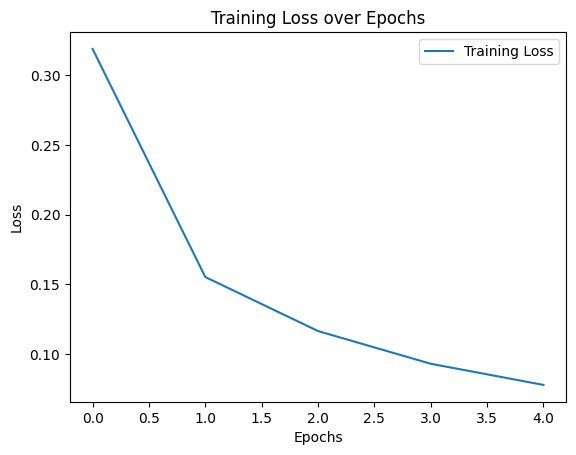

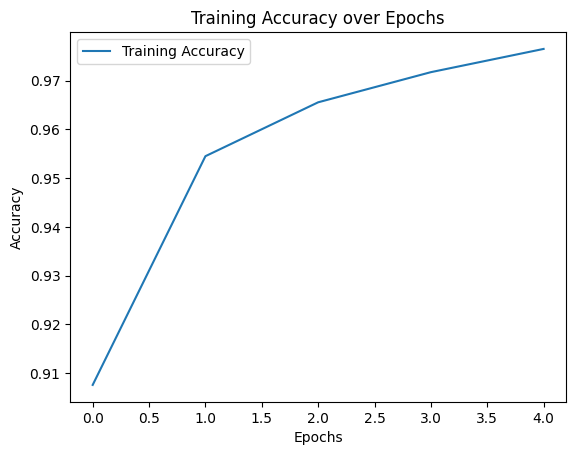

In [11]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.show()

In [12]:
# Make predictions on the test dataset
test_predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [13]:
# print(test_predictions,y_test)

In [14]:
# loss_test = loss_fn(y_test[:1], test_predictions).numpy()
# loss_test

In [15]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9748
Test Loss: 0.07875800877809525
Test Accuracy: 0.9747999906539917


In [16]:
# # Make predictions on new data
# predictions_new = model.predict(new_data)

In [17]:
# # Save the model
# model.save("my_model.h5")

In [18]:
# # Load the saved model
# loaded_model = tf.keras.models.load_model("my_model.h5")